In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from numpy import genfromtxt
data = genfromtxt('MultipleR.csv', delimiter=',')

## Batch ADAM 

In [3]:
data.shape

(25, 4)

In [4]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [5]:
xs = data [:,:-1]
xs

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [6]:
ys = data [:,-1]
ys.reshape(-1,1)

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [7]:
xs = np.insert(xs, 0, 1, axis=1)
xs

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [25]:
def adam(x, y, lr, beta1, beta2, epsilon, epochs):
    
    loss = []
    thetas = np.zeros((xs.shape[1],1))  
    thetaslist = []
    v0 = 0
    m0 = 0
    t = 1
    iterations = 0
    x_batches = np.split(x, 25)
    y_batches = np.split(y, 25)


    for i in range(epochs):
        for bx, by in zip(x_batches, y_batches):
            pred = np.dot(bx,thetas)
            error = pred - by
            j = (1/(2 * len(bx))) * np.dot(error.T,error) 
            loss.append(j)
            
# Calculate the gradients 
            gradient_thetas = (1 / len(bx)) * np.dot(bx.T,error)  
    
# Update the m and v parameter
            m_new = beta1 * m0 + (1 - beta1) * (gradient_thetas)
            v_new = beta2 * v0 + (1 - beta2) * np.dot(gradient_thetas.T , gradient_thetas)
            
# Bias correction for m and v
            m_new = m_new / (1 - beta1**t)
            v_new = v_new / (1 - beta2**t)
# Update the parameter
            thetas = thetas - ((lr / (np.sqrt(v_new) + epsilon)) * m_new)
            thetaslist.append(thetas)
        
            v0 = v_new
            iterations += 1
            t += 1
            
            if np.linalg.norm(gradient_thetas) < 0.0001:
                break
            if t % 100 == 0:
                print(f"Iteration {t}")
                
    return loss, pred, thetas,t,thetaslist

In [26]:
lr=.01
beta1=.9
beta2=.9
epsilon=1e-08
epochs=2500

In [27]:
loss, pred, thetas,t,thetaslist =adam(xs, ys, lr, beta1, beta2, epsilon, epochs)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900
Iteration 2000
Iteration 2100
Iteration 2200
Iteration 2300
Iteration 2400
Iteration 2500
Iteration 2600
Iteration 2700
Iteration 2800
Iteration 2900
Iteration 3000
Iteration 3100
Iteration 3200
Iteration 3300
Iteration 3400
Iteration 3500
Iteration 3600
Iteration 3700
Iteration 3800
Iteration 3900
Iteration 4000
Iteration 4100
Iteration 4200
Iteration 4300
Iteration 4400
Iteration 4500
Iteration 4600
Iteration 4700
Iteration 4800
Iteration 4900
Iteration 5000
Iteration 5100
Iteration 5200
Iteration 5300
Iteration 5400
Iteration 5500
Iteration 5600
Iteration 5700
Iteration 5800
Iteration 5900
Iteration 6000
Iteration 6100
Iteration 6200
Iteration 6300
Iteration 6400
Iteration 6500
Iteration 6600
Iteration 6700
Iter

Iteration 53700
Iteration 53800
Iteration 53900
Iteration 54000
Iteration 54100
Iteration 54200
Iteration 54300
Iteration 54400
Iteration 54500
Iteration 54600
Iteration 54700
Iteration 54800
Iteration 54900
Iteration 55000
Iteration 55100
Iteration 55200
Iteration 55300
Iteration 55400
Iteration 55500
Iteration 55600
Iteration 55700
Iteration 55800
Iteration 55900
Iteration 56000
Iteration 56100
Iteration 56200
Iteration 56300
Iteration 56400
Iteration 56500
Iteration 56600
Iteration 56700
Iteration 56800
Iteration 56900
Iteration 57000
Iteration 57100
Iteration 57200
Iteration 57300
Iteration 57400
Iteration 57500
Iteration 57600
Iteration 57700
Iteration 57800
Iteration 57900
Iteration 58000
Iteration 58100
Iteration 58200
Iteration 58300
Iteration 58400
Iteration 58500
Iteration 58600
Iteration 58700
Iteration 58800
Iteration 58900
Iteration 59000
Iteration 59100
Iteration 59200
Iteration 59300
Iteration 59400
Iteration 59500
Iteration 59600
Iteration 59700
Iteration 59800
Iteratio

In [29]:
thetas0 = []
thetas1 = []
thetas2 = []
thetas3 = []

for i in range(len(thetaslist)):
    thetas0.append(thetaslist[i][0])
    thetas1.append(thetaslist[i][1])
    thetas2.append(thetaslist[i][2])
    thetas3.append(thetaslist[i][3])

In [11]:
print (f"final Loss : {loss[-1]}")
print (f"final model parameters : {thetas}")

final Loss : [[0.45331342]]
final model parameters : [[-0.00125426]
 [ 0.40651848]
 [ 0.5154853 ]
 [ 1.0962662 ]]


In [12]:
loss = np.array(loss)
loss = loss.reshape((-1,1))
loss

array([[1.15520000e+04],
       [1.68215827e+04],
       [1.58331013e+04],
       ...,
       [2.90004164e+01],
       [3.30125114e+00],
       [4.53313417e-01]])

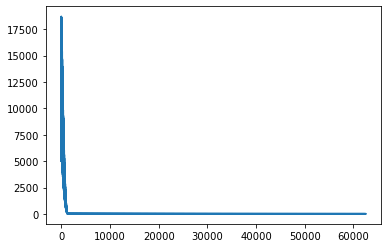

In [13]:
iterations =[ i for i in range (0,t-1)] #t is 2501 instance because it contains last iteration which we stopped at it
plt.plot(iterations, loss)
plt.show()

In [33]:
loss

[array([[11552.]]),
 array([[16821.58274679]]),
 array([[15833.1013009]]),
 array([[18735.53431443]]),
 array([[9827.84330959]]),
 array([[4965.6955633]]),
 array([[10814.67204982]]),
 array([[6447.91748446]]),
 array([[14919.09077589]]),
 array([[13105.2022509]]),
 array([[9675.80716919]]),
 array([[9679.20534853]]),
 array([[16471.75014803]]),
 array([[11237.82213084]]),
 array([[10660.07353158]]),
 array([[17955.20231941]]),
 array([[10513.75424287]]),
 array([[16311.09180842]]),
 array([[15241.72031839]]),
 array([[12300.12443727]]),
 array([[15253.28895167]]),
 array([[14907.27221255]]),
 array([[14923.64615025]]),
 array([[10790.64002646]]),
 array([[17938.85806371]]),
 array([[11237.77683792]]),
 array([[16652.93875667]]),
 array([[15758.46144919]]),
 array([[18683.70629361]]),
 array([[9811.69547009]]),
 array([[4958.78025491]]),
 array([[10801.11798795]]),
 array([[6440.93281387]]),
 array([[14903.10577938]]),
 array([[13092.26932137]]),
 array([[9666.28698483]]),
 array([[967

In [36]:
loss = np.array(loss)
loss = loss.reshape((-1,1))
loss.shape

(62500, 1)

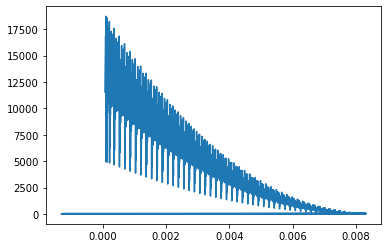

In [37]:
plt.plot(thetas0, loss)
plt.show()

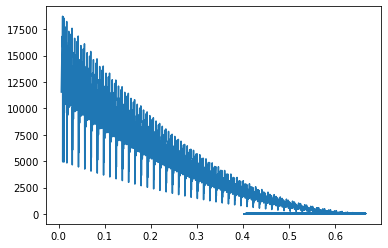

In [38]:
plt.plot(thetas1, loss)
plt.show()

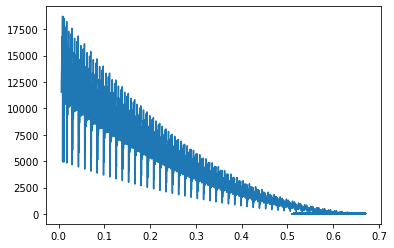

In [39]:
plt.plot(thetas2, loss)
plt.show()

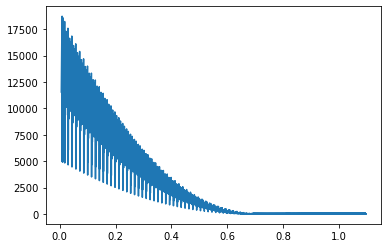

In [40]:
plt.plot(thetas3, loss)
plt.show()

In [14]:
pred = np.dot(xs,thetas)
pred

array([[153.1333841 ],
       [185.12042774],
       [181.75201112],
       [199.16869961],
       [140.43525885],
       [105.55119017],
       [150.60693075],
       [113.74826332],
       [174.75315053],
       [164.66910255],
       [144.15992474],
       [143.08528291],
       [186.53629246],
       [153.37996258],
       [151.59423013],
       [188.92471164],
       [144.91468658],
       [181.27317658],
       [177.47591315],
       [158.90496481],
       [176.32895524],
       [174.79682175],
       [167.67509441],
       [151.51433065],
       [191.1099421 ]])

In [15]:
from sklearn.metrics import r2_score
r2_score(ys, pred)

0.9887494400153323

## Mini-Batch Griedent Decent 

In [42]:
def mini_adam(x, y, lr, beta1, beta2, epsilon, epochs, batchsize):
    
    loss = []
    thetas = np.zeros((xs.shape[1],1))
    thetaslist = []
    v0 = 0
    m0 = 0
    t = 1
    iterations = 0
    x_batches = np.split(x,  batchsize)
    y_batches = np.split(y,  batchsize)


    for i in range(epochs):
        for bx, by in zip(x_batches, y_batches):
            pred = np.dot(bx,thetas)
            #print(pred)
            by = by.reshape( batchsize,1)
            error = pred - by
            #print(error)
            j = (1/(2 * len(bx))) * np.dot(error.T,error) 
            loss.append(j)
            
# Calculate the gradients 
            #print(error)
            gradient_thetas = (1 / len(bx)) * np.dot(bx.T,error)
            #print(gradient_thetas)
            #print(bx)
        
    
# Update the m and v parameter
            m_new = beta1 * m0 + (1 - beta1) * (gradient_thetas)
            v_new = beta2 * v0 + (1 - beta2) * (gradient_thetas.T @ gradient_thetas)
            
# Bias correction for m and v
            m_cor = m_new / (1 - beta1**t)
            v_cor = v_new / (1 - beta2**t)
            
# Update the parameter
            thetas = thetas - (m_cor / (np.sqrt(v_cor) + epsilon)) * lr
            thetaslist.append(thetas)
        
            v0 = v_new
            m0 = m_new
            iterations += 1
            t += 1
            
            if np.linalg.norm(gradient_thetas) < 0.0001:
                break
            if t % 100 == 0:
                print(f"Iteration {t}")
                
                

    return loss, pred, thetas,t,thetaslist

In [43]:
lr=.01
beta1=.9
beta2=.1
epsilon=1e-08
epochs=1500
batchsize=5

In [44]:
mloss, mpred, mthetas,mt,thetaslist = mini_adam(xs, ys, lr, beta1, beta2, epsilon, epochs, batchsize)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900
Iteration 2000
Iteration 2100
Iteration 2200
Iteration 2300
Iteration 2400
Iteration 2500
Iteration 2600
Iteration 2700
Iteration 2800
Iteration 2900
Iteration 3000
Iteration 3100
Iteration 3200
Iteration 3300
Iteration 3400
Iteration 3500
Iteration 3600
Iteration 3700
Iteration 3800
Iteration 3900
Iteration 4000
Iteration 4100
Iteration 4200
Iteration 4300
Iteration 4400
Iteration 4500
Iteration 4600
Iteration 4700
Iteration 4800
Iteration 4900
Iteration 5000
Iteration 5100
Iteration 5200
Iteration 5300
Iteration 5400
Iteration 5500
Iteration 5600
Iteration 5700
Iteration 5800
Iteration 5900
Iteration 6000
Iteration 6100
Iteration 6200
Iteration 6300
Iteration 6400
Iteration 6500
Iteration 6600
Iteration 6700
Iter

In [45]:
print (f"final Loss : {mloss[-1]}")
print (f"final model parameters : {mthetas}")

final Loss : [[6.39781785]]
final model parameters : [[-0.02464699]
 [ 0.35612313]
 [ 0.53398996]
 [ 1.12410861]]


In [46]:
mloss = np.array(mloss)
mloss = mloss.reshape((-1,1))
mloss.shape

(7500, 1)

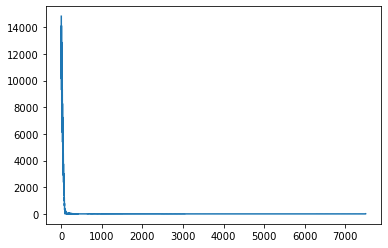

In [47]:

plt.plot(range(len(mloss)), mloss)
plt.show()

In [48]:
thetas0 = []
thetas1 = []
thetas2 = []
thetas3 = []

for i in range(len(thetaslist)):
    thetas0.append(thetaslist[i][0])
    thetas1.append(thetaslist[i][1])
    thetas2.append(thetaslist[i][2])
    thetas3.append(thetaslist[i][3])

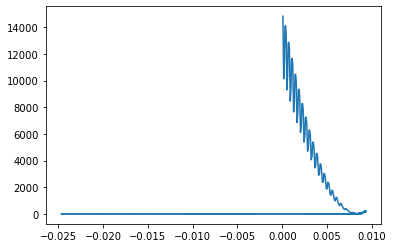

In [51]:
plt.plot(thetas0, mloss)
plt.show()

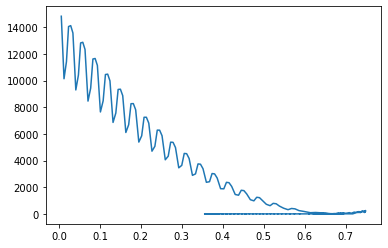

In [52]:
plt.plot(thetas1, mloss)
plt.show()

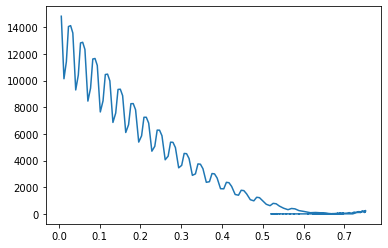

In [53]:
plt.plot(thetas2, mloss)
plt.show()

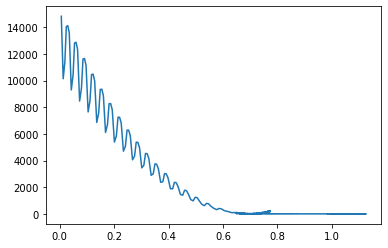

In [54]:
plt.plot(thetas3, mloss)
plt.show()

In [49]:
mpred = np.dot(xs,mthetas)
mpred

array([[152.99968452],
       [184.62802188],
       [181.4331734 ],
       [198.90505118],
       [139.903282  ],
       [105.23939094],
       [150.61946946],
       [114.06309484],
       [174.31304761],
       [164.40993568],
       [143.98707516],
       [142.7973571 ],
       [186.11773438],
       [152.88820607],
       [151.56571124],
       [188.53433769],
       [144.24159007],
       [181.42252423],
       [177.11460577],
       [158.63048728],
       [176.27036168],
       [174.43478574],
       [167.6233562 ],
       [151.17358933],
       [190.61455831]])

In [23]:
from sklearn.metrics import r2_score
r2_score(ys, mpred)

0.9890126066218484